<a href="https://colab.research.google.com/github/aidancaputi/ece495cv/blob/main/fruit_ripeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up dataset dir


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install dependencies

In [2]:
!pip install ultralytics
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/166.8 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

## Set up data
If you do this right, it should print out the contents of our shared folder in google drive

In [ ]:
#you need to go right click on the shared folder ('49595 project'), then organize, then add shortcut
#this will prompt you to put it somewhere in your drive
#once you've put it somewhere in your drive, then you can use it
#for some reason, it will only recognize the data.yaml file if its in your own drive, not the shared with me part

#path to where you added the shortcut to the shared folder (read above if this makes no sense to you)
###### CHANGE THIS TO YOUR PERSONAL LOCATION ######
shortcut_location = '/content/drive/MyDrive/ECE49595CV/49595-project'

#the folders we need from within that shared folder
dataset_folder = shortcut_location + '/dataset/bananas/'
pretrained_folder = shortcut_location + '/pretrained-models/'
trained_folder = shortcut_location +  '/trained-models/'

#print the stuff to see if you got it right
!ls {shortcut_location}

'49595 project.gdoc'   dataset	 fruit-ripeness.ipynb   pretrained-models   trained-models


##Training


Training basically only needs 2 things:
*   First is the 'data.yaml' file. This basically just tells it where the images are and what the classes in the labels mean
*   Second is the pre-trained model





## Train the models

This only has to be run once, afterwards the models are saved and can be reused

In [ ]:
# sets up the pre trained model from the shared folder

# the pretrained model we are using
model_name = 'yolov8x'

# load the pretrained model
model = YOLO(pretrained_folder + model_name + '.pt')

# train on our dataset
results = model.train(data=dataset_folder + 'joshs-data.yaml',
                      epochs=25, # how long to train for
                      project=trained_folder,  # where to save the model after it's done training
                      name=model_name) # what to name the model

# validate to see final performance
results = model.val()

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/ECE49595CV/49595-project/pretrained-models/yolov8x.pt, data=/content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/joshs-data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/ECE49595CV/49595-project/trained-models/, name=yolov8x5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_st

## Test the models

Load each model, test each model on the same test image, compare results


image 1/1 /content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/different-ripeness-levels.jpg: 384x640 1 freshripe, 2 overripes, 4 ripes, 1 rotten, 51.6ms
Speed: 3.0ms preprocess, 51.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Object detection and classification results for model yolov8x10epoch.pt


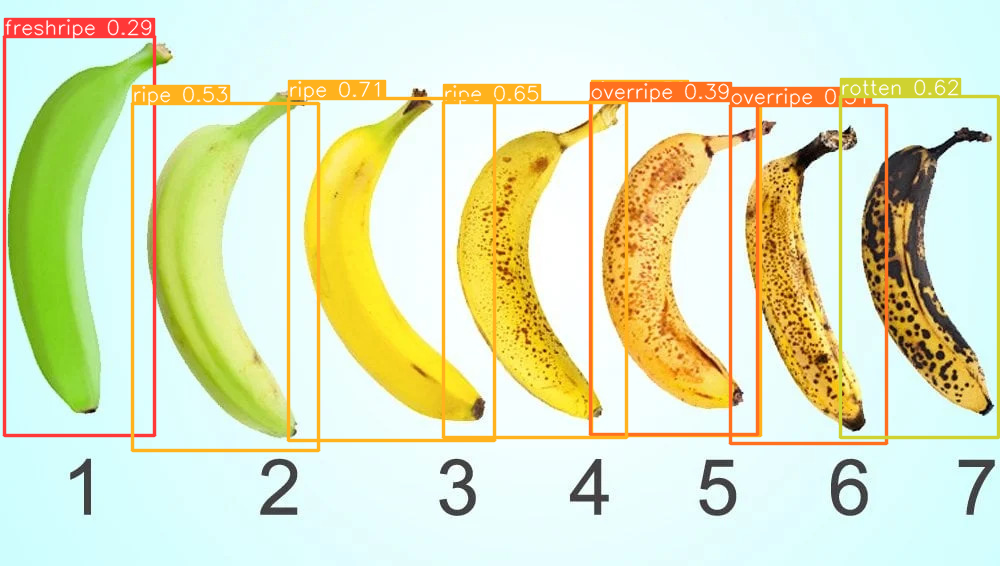


image 1/1 /content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/different-ripeness-levels.jpg: 384x640 3 ripes, 2 rottens, 9.8ms
Speed: 2.3ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Object detection and classification results for model yolov8s10epoch.pt


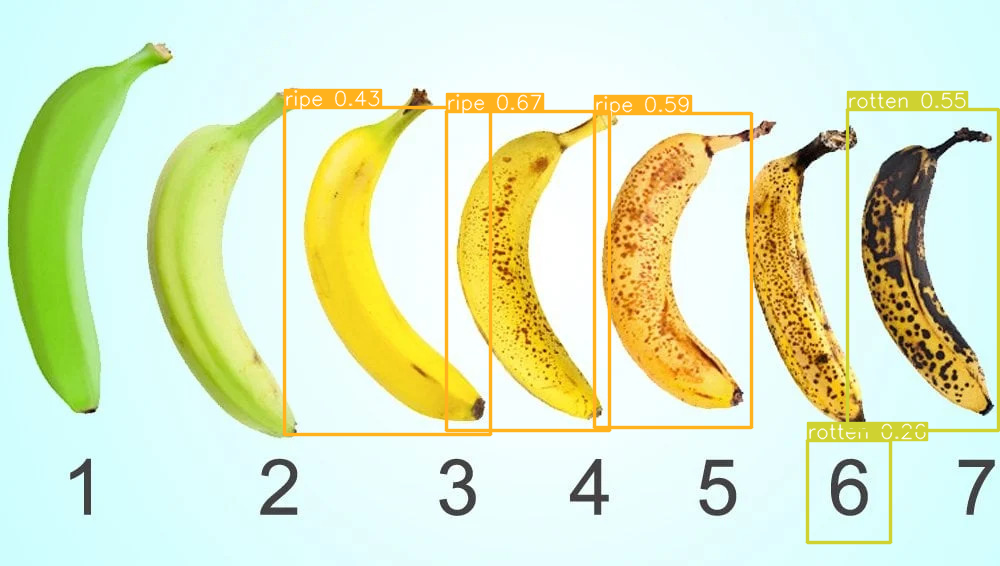


image 1/1 /content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/different-ripeness-levels.jpg: 384x640 2 freshripes, 6 ripes, 1 rotten, 21.2ms
Speed: 2.1ms preprocess, 21.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Object detection and classification results for model yolov8m10epoch.pt


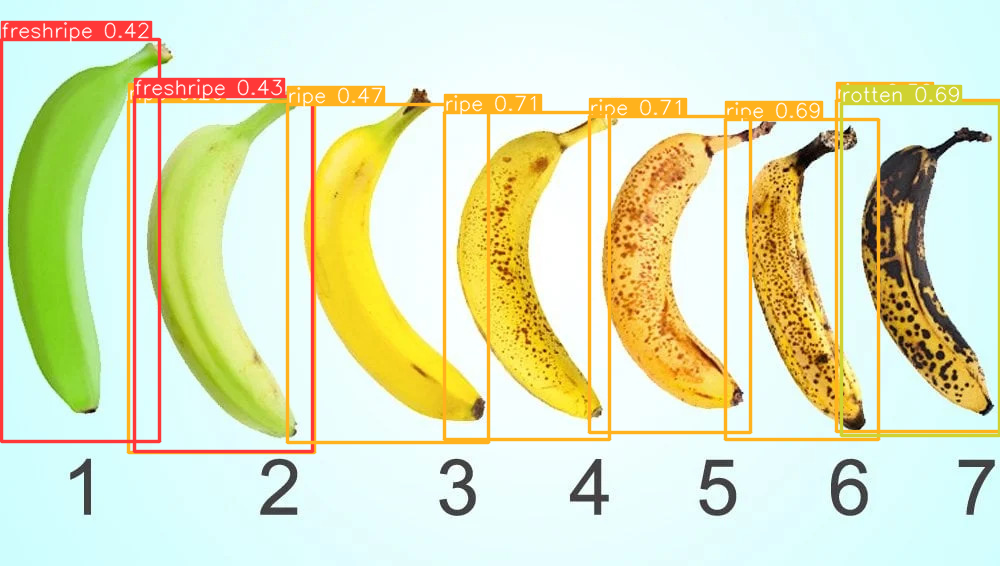


image 1/1 /content/drive/MyDrive/ECE49595CV/49595-project/dataset/bananas/different-ripeness-levels.jpg: 384x640 1 freshripe, 1 overripe, 5 ripes, 1 rotten, 42.0ms
Speed: 3.1ms preprocess, 42.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Object detection and classification results for model yolov8l10epoch.pt


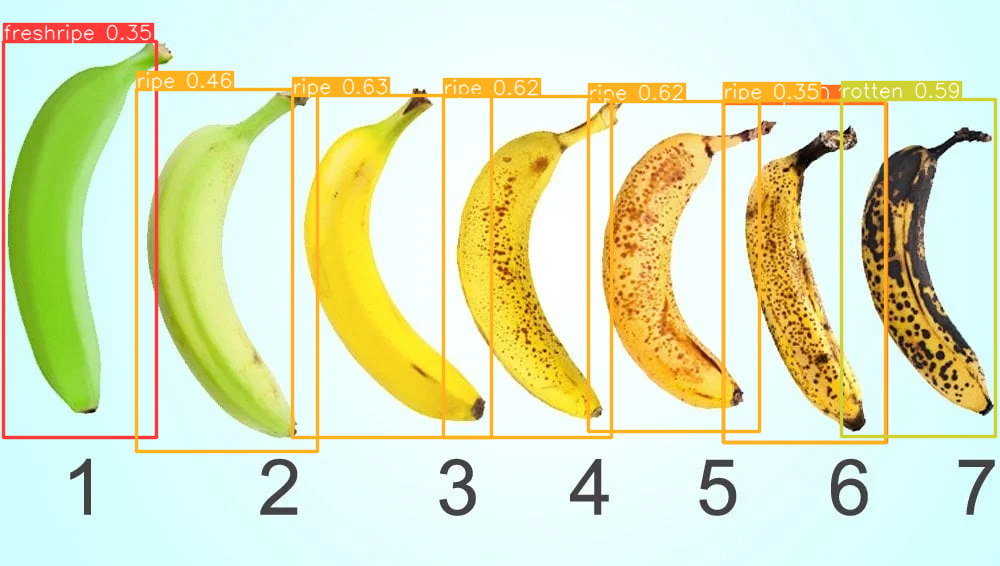

In [ ]:
import os
from PIL import Image


# to run an inference on a test image:
# 1. load the model using YOLO("model_name.pt")
#      - the best model so far is yolov8x10epoch.pt in /trained-models/
# 2. run the model on the image using model_name(test_image)
# 3. display the predictions using PIL (copy and paste the results for loop)


# load an image to test the models on
test_image = dataset_folder + 'different-ripeness-levels.jpg'

for model in os.listdir(trained_folder):
    if model.endswith('.pt'):
        loaded_model = YOLO(trained_folder + model) # 1. load model
        results = loaded_model(test_image) # 2. run model on the image

        # 3. display the predictions using PIL
        for r in results:
            im_array = r.plot() # plot a BGR numpy array of predictions
            im = Image.fromarray(im_array[..., ::-1]) # RGB PIL image
            print("Object detection and classification results for model " + model) # print model name
            display(im) # show image


##Days until ripe test - Aidan C

In [113]:
import os
from PIL import Image

aidanc_best_model = YOLO('/content/drive/MyDrive/College/Fall2023/ECE495CV/49595-project/trained-models/yolov8x10epoch.pt')
aidanc_dataset_folder = '/content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/'

predictions_dict = {}

#for image in test dataset folder
for image in os.listdir(aidanc_dataset_folder):

  #create an entry in the dict with that image name
  predictions_dict.update({image:[]})

  #predict on the image
  results = aidanc_best_model(aidanc_dataset_folder + image)

  #for each prediction in the output
  for result in results:

    #add the class and boxes to the dict entry for that image
    predictions_dict.update({image:[
        result.boxes.cls,
        result.boxes.xyxy,
    ]})



image 1/1 /content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/day1-ripe-14.png: 640x608 3 freshunripes, 95.3ms
Speed: 3.8ms preprocess, 95.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 608)

image 1/1 /content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/day2-ripe-13.png: 640x640 3 freshunripes, 70.5ms
Speed: 3.9ms preprocess, 70.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/day3-ripe-12.png: 640x640 1 freshripe, 3 freshunripes, 66.6ms
Speed: 3.8ms preprocess, 66.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/College/Fall2023/ECE495CV/days-until-ripe-test/timelapse/day4-ripe-11.png: 576x640 3 freshunripes, 48.4ms
Speed: 3.7ms preprocess, 48.4ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)

image 1/1 /content/drive/MyDrive/Colle

In [114]:
import torchvision, cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions


In [115]:
X = []
y = []

#go through predictions dict
for im in predictions_dict:

  label_name = im.split('-')[2].split('.')[0] + '-until-' + im.split('-')[1]

  #for each box in the image, get class and coordinates
  for cls, box in zip(predictions_dict[im][0], predictions_dict[im][1]):

    #load the original image
    loaded_image = Image.open(aidanc_dataset_folder + im)

    #crop the bounding box
    cropped_image = loaded_image.crop((int(box[0]),int(box[1]),int(box[2]),int(box[3])))

    #get the color palette for that bounding box
    reduced = cropped_image.convert("P", palette=Image.WEB)
    palette = reduced.getpalette()
    palette = [palette[3*n:3*n+3] for n in range(256)] # group 3 by 3 = [[r,g,b],[r,g,b],...]
    color_counts = [(n, palette[m]) for n,m in reduced.getcolors()]

    #go through color counts and remove white to filter background
    filtered_color_counts = [item for item in color_counts if (item[1][0] <= 250 and item[1][1] <= 250 and item[1][2] <= 250)]

    for color in filtered_color_counts[0:10]:
      X.append(label_name)

      y.append(np.array(color[1]))

for lab, val in zip(X, y):
  print(lab, val)

14-until-ripe [143 216  13]
14-until-ripe [152 227  47]
14-until-ripe [164 232  53]
14-until-ripe [136 200   5]
14-until-ripe [170 235  74]
14-until-ripe [146 219  40]
14-until-ripe [119 183   3]
14-until-ripe [151 226  21]
14-until-ripe [111 168   2]
14-until-ripe [178 241  80]
14-until-ripe [165 232  52]
14-until-ripe [145 215   9]
14-until-ripe [154 228  46]
14-until-ripe [142 200   5]
14-until-ripe [230 230 231]
14-until-ripe [247 247 247]
14-until-ripe [178 242  84]
14-until-ripe [172 236  73]
14-until-ripe [186 245 104]
14-until-ripe [138 185   8]
14-until-ripe [144 216  12]
14-until-ripe [165 232  52]
14-until-ripe [153 227  46]
14-until-ripe [140 200   6]
14-until-ripe [171 236  73]
14-until-ripe [178 241  83]
14-until-ripe [146 219  40]
14-until-ripe [119 183   4]
14-until-ripe [112 168   3]
14-until-ripe [150 226  21]
13-until-ripe [169 233  49]
13-until-ripe [148 216   6]
13-until-ripe [151 228  43]
13-until-ripe [181 242  75]
13-until-ripe [140 200   3]
13-until-ripe [150 2

In [116]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression


#train regression model
knn_X = np.array(X)
knn_y = np.array(y)

scalar = StandardScaler()
labeler = LabelEncoder()

scalar.fit(knn_y)
labeler.fit(knn_X)

knn_y = scalar.transform(knn_y)
knn_X = labeler.transform(knn_X).reshape(-1, 1)

logistic_regression = LogisticRegression()
logistic_regression.fit(knn_X, knn_y)

ValueError: ignored